In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['DESCR', 'target', 'data', 'feature_names'])

In [5]:
#sns.pairplot(pd.DataFrame(boston['data'], columns=boston['feature_names']))
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'], test_size=0.33, random_state=42)

In [7]:
model = LinearRegression()

In [8]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
predictions = model.predict(X_test)

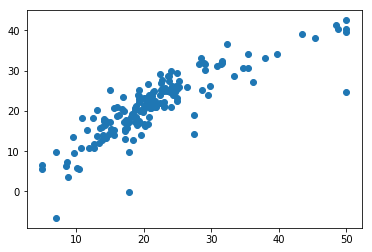

In [10]:
plt.scatter(y_test, predictions)

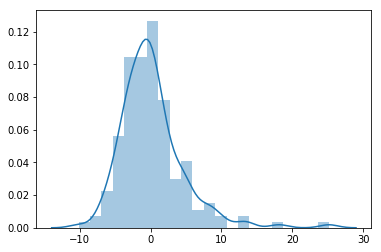

In [11]:
sns.distplot((y_test - predictions))

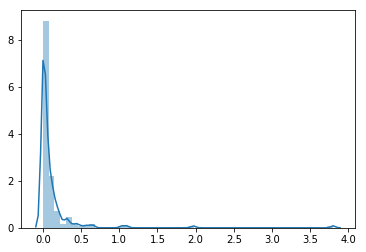

In [12]:
sns.distplot(((y_test - predictions)**2)/y_test.shape[0])

In [13]:
metrics.mean_squared_error(y_test, predictions)

20.747143360308847

In [ ]:
Boston Dataset using ANN =================>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score, KFold
from keras.wrappers.scikit_learn import KerasRegressor

boston = load_boston()
boston.keys()

x = pd.DataFrame(boston['data'],columns=boston['feature_names'])
y = boston['target']

chas = pd.get_dummies(x['CHAS'], prefix='CHAS', drop_first=True)
rad = pd.get_dummies(x['RAD'], prefix='RAD', drop_first=True)
zn = pd.get_dummies(x['ZN'], prefix='ZN', drop_first=True)
x.drop(columns=['CHAS', 'RAD', 'ZN'], axis=1, inplace=True)
x = pd.concat([x, chas, rad, zn], axis=1)

sc = StandardScaler()
x = sc.fit_transform(x)

def build_model():
    model = Sequential()
    model.add(Dense(x.shape[1], activation='relu',kernel_initializer='normal', input_shape=(x.shape[1],)))
    model.add(Dense(6,kernel_initializer='normal', activation='relu'))
    model.add(Dense(1,kernel_initializer='normal'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

estimator = KerasRegressor(build_fn=build_model, epochs=50, batch_size=5, verbose=0)
seed = 7
np.random.seed(seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, x, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

C:\Users\Jeet\Anaconda3\envs\virtual_env\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Results: -16.88 (8.35) MSE
